In [1]:
import pickle
import gzip
from matplotlib import pyplot as plt
import networkx as nx

In [2]:
with gzip.open(f'tests/energies_1.pkl.gz', 'r') as fff:
    energy_db = pickle.load(fff)

with gzip.open(f'tests/traj_inh_1.pkl.gz', 'r') as fff:
    traj_inh = pickle.load(fff)

with gzip.open(f'tests/coors_1.pkl.gz', 'r') as fff:
    coors_db = pickle.load(fff)

with gzip.open(f'tests/dihed_1.pkl.gz', 'r') as fff:
    dihed_db = pickle.load(fff)

In [3]:
len(energy_db)

22028

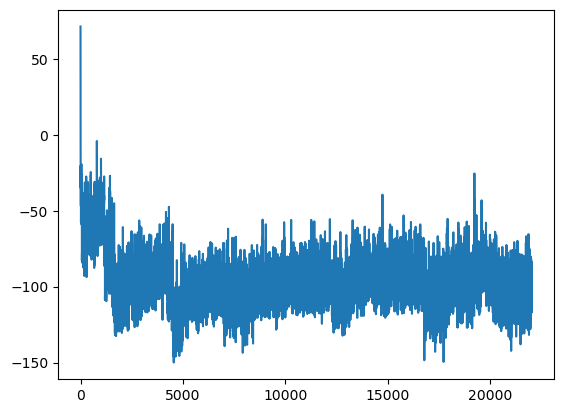

In [4]:
plt.plot(range(len(energy_db)), energy_db)

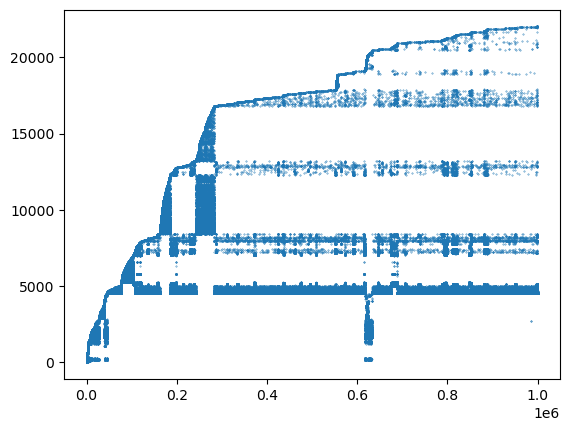

In [5]:
plt.scatter(range(len(traj_inh)),traj_inh, s=0.1)

In [6]:
pesos_transiciones={}
pesos_nodos={}

In [7]:
for ii in range(len(traj_inh)-1):
    nodo_1 = traj_inh[ii]
    nodo_2 = traj_inh[ii+1]
    if (nodo_1, nodo_2) in pesos_transiciones:
        pesos_transiciones[nodo_1, nodo_2]+=1
    else:
        pesos_transiciones[nodo_1, nodo_2]=1
    if nodo_1 in pesos_nodos:
        pesos_nodos[nodo_1]+=1
    else:
        pesos_nodos[nodo_1]=1

In [8]:
G = nx.DiGraph()  # Para un grafo dirigido

In [9]:
# Agregar las aristas desde el diccionario
for nodes, peso in pesos_transiciones.items():
    G.add_edge(nodes[0], nodes[1])

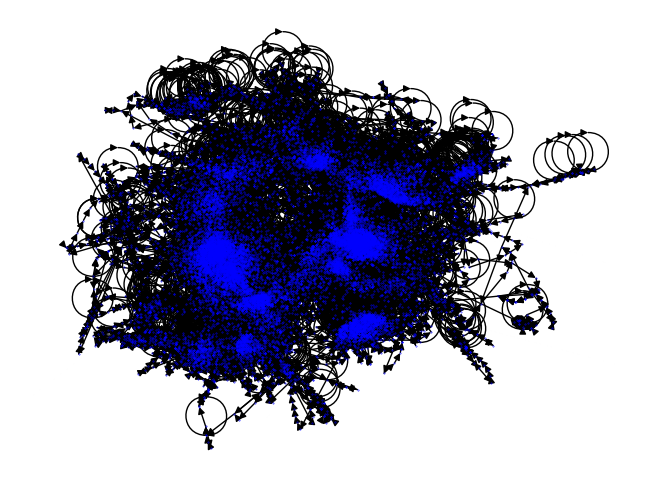

In [10]:
nx.draw(G, with_labels=False, node_color="blue", node_size=0.1)
plt.show()